# Módulo 4 - Aprendizado supervisionado

Neste notebook, implementaremos algoritmos de aprendizado supervisionado. Na primeira parte, veremos a implementação de árvores de decisão. Na segunda parte, veremos a random forests. Para isto, utilizaremos a biblioteca [scikit-learn](http://scikit-learn.org) do Python. Em ambos os casos, o objetivo é entender como estes algoritmos funcionam. Ao final, você deverá realizar os exercícios propostos.

## Parte 1 - Árvores de decisão

Primeiramente, precisamos importar algumas bibliotecas.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.metrics import accuracy_score, precision_score, recall_score
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd
import numpy as np

Feito isto, agora iremos importar um dataset clássico da literatura, o [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris). Felizmente, este dataset já está incluído na biblioteca scikit-learn. Desta forma, basta executar o comando abaixo para importá-lo.

In [2]:
iris = load_iris()

O dataset acima possui diversas instâncias de exemplo. Nosso objetivo é utilizar aprendizado supervisionado para aprender a distinguir espécies de iris com base na largura e comprimento de suas sépalas e pétalas. Para isto, precisamos separar as colunas representando as features de entrada (variável `X` abaixo) das classes de saída (variável `y` abaixo).

In [3]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

Para entender melhor os dados de entrada, podemos listar os primeiros 10 registros como segue.

In [4]:
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Da mesma forma, podemos verificar os dados de saída como segue.

In [5]:
y

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

Com base na saída acima, note que temos 150 amostras de iris. Podemos ver também que as amostras de iris pertencem às espécies iris setosa, iris versicolor e iris virginica.

Agora, precisamos converter os dados de saída para um formato [categórico](https://pt.wikipedia.org/wiki/Variável_categórica). Isto vai facilitar o processo de aprendizagem. Para isto, podemos executar o comando abaixo.

In [6]:
y = pd.get_dummies(y)
y

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


Com os comandos acima, agora temos um conjunto de exemplos de entrada (`X`) e saída (`y`). No entanto, lembre-se que, para poder validar os modelos aprendidos, é preciso não apenas treiná-los, mas também testá-los. Para isto, podemos dividir aleatoriamente o conjunto de dados em conjunto de treino e de teste como segue.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Até aqui, nosso objetivo foi processar os dados. Agora podemos nos preocupar com os algoritmos em si.

O código abaixo cria uma instância do algoritmo [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) para a tarefa de classificação. Em sua chamada padrão, o algoritmo utiliza o índice Gini para escolher as features.

In [8]:
dt = DecisionTreeClassifier()

Criado o algoritmo, agora podemos finalmente treinar o modelo. Para isto, basta chamar a função `fit`, que recebe um conjunto de dados de treino (separados em entradas e saídas) e encontra a melhor árvore de decisão para representar estes dados.

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Após treinar o algoritmo, podemos analisar os resultados. Primeiramente, vamos visualizar a árvore resultante.

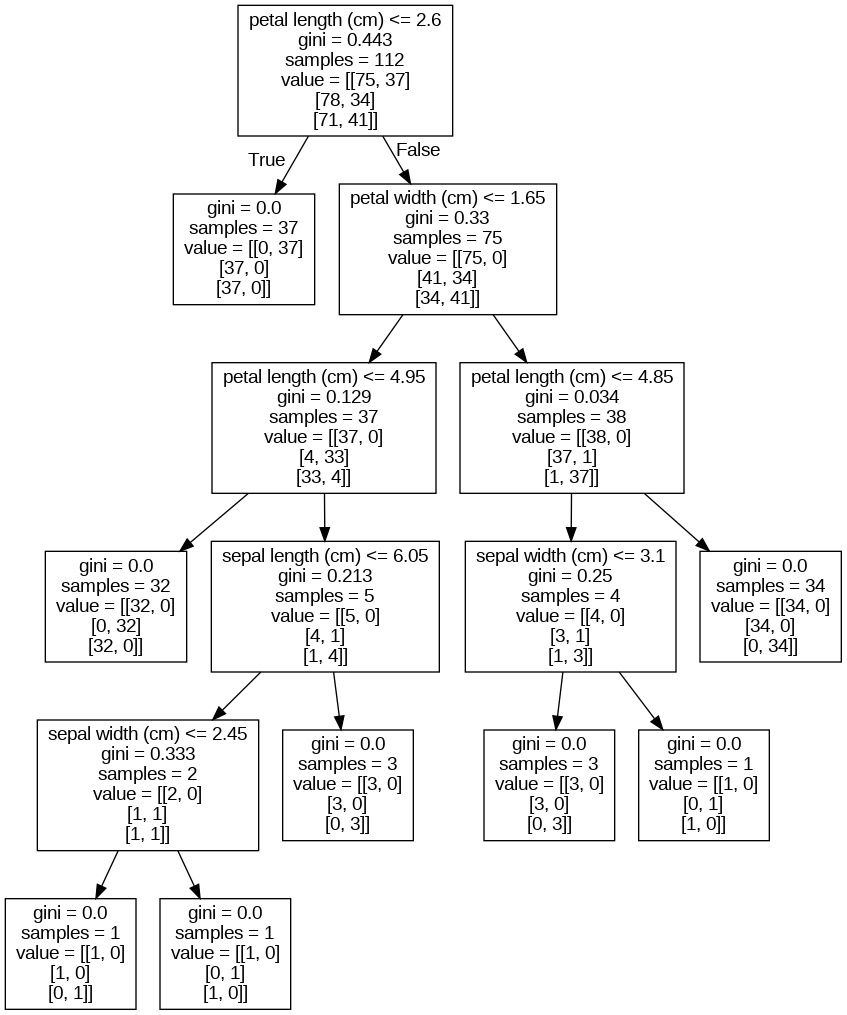

In [10]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Para avaliar nosso algoritmo, podemos verificar o quão bem ele se sai na classificação de dados novos. Para isto, podemos utilizar os dados de teste.

Em particular, a função `predict` recebe um conjunto de dados de entrada (`X_test`) e retorna a classificação obtida através do algoritmo.

In [11]:
y_pred = dt.predict(X_test)

Para medir o desempenho do nosso método, podemos calcular algumas métricas como acurácia, precisão e recall.

In [12]:
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='micro')
r = recall_score(y_test, y_pred, average='micro')

print('Accuracy:\t%f' % a)
print('Precision:\t%f' % p)
print('Recall: \t%f' % r)

Accuracy:	0.973684
Precision:	0.973684
Recall: 	0.973684


Os resultados acima mostram que o algoritmo obteve um bom desempenho. De fato, ao gerar a matriz de confusão abaixo, podemos observar que os apenas uma instância foi classificada incorretamente.

In [13]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

### Exercício 1

Crie uma árvore de decisão para resolver um dos outros datasets de classificação disponíveis no scikit-learn. A lista de datasets pode ser encontrada [aqui](https://scikit-learn.org/stable/datasets/real_world.html). A tarefa consiste em importar os dados, treinar o algoritmo e avaliar os resultados.

[Forest covertypes](https://scikit-learn.org/stable/datasets/real_world.html#covtype-dataset)

As amostras neste conjunto de dados correspondem a manchas de 30×30m de floresta nos EUA, coletadas para a tarefa de prever o tipo de cobertura de cada mancha, ou seja, a espécie dominante de árvore. Existem sete tipos de cobertura, tornando este um problema de classificação multiclasse. Cada amostra tem 54 características, descritas na [homepage do dataset](https://archive.ics.uci.edu/dataset/31/covertype).

In [14]:
# Realizando importações
from sklearn.datasets import fetch_covtype
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Carregando os dados
covtype_data = fetch_covtype()
X = covtype_data.data
y = covtype_data.target

In [16]:
# Explorando os dados
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

Formato de X: (581012, 54)
Formato de y: (581012,)


In [17]:
# Explorando os dados
df = pd.DataFrame(X, columns=covtype_data.feature_names)
df['target'] = y

print(df.head(2))

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     2596.0    51.0    3.0                             258.0   
1     2590.0    56.0    2.0                             212.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                             0.0                            510.0   
1                            -6.0                            390.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          221.0           232.0          148.0   
1          220.0           235.0          151.0   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                              6279.0  ...           0.0           0.0   
1                              6225.0  ...           0.0           0.0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0         

In [18]:
# Explorando os dados
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [19]:
# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Treinando o modelo
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# Fazendo as predições
y_pred = clf.predict(X_test)

In [22]:
# Avaliação de performance - Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.9388656058793663


In [23]:
# Avaliação de performance - Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.84      0.85      0.84       549
           5       0.84      0.84      0.84      1899
           6       0.88      0.87      0.88      3473
           7       0.95      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



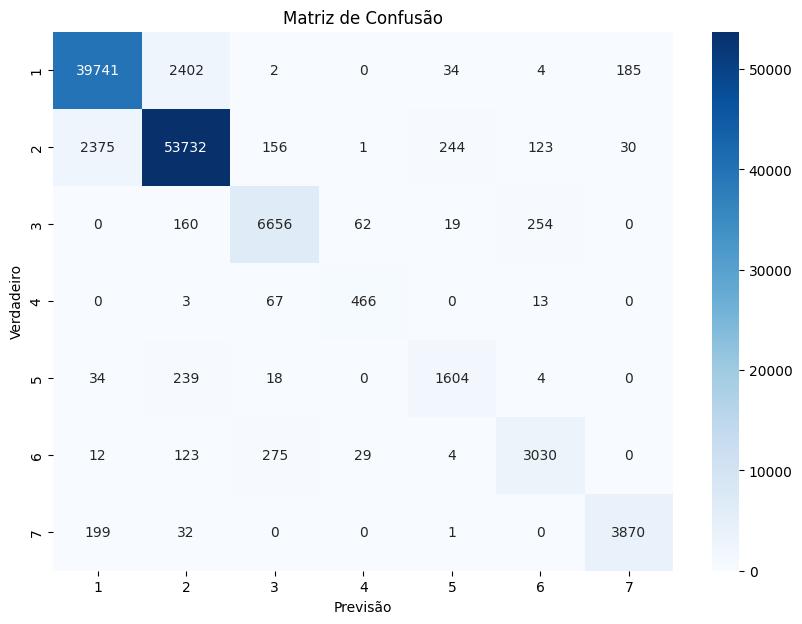

In [24]:
# Avaliação de performance - Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y)
class_labels = [str(c) for c in classes]
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

## Parte 2 - Random forests

Nesta segunda parte do notebook, veremos como utilizar random forests.

Primeiramente, precisamos importar os dados e tratá-los novamente. Utilizaremos novamente o dataset de plantas iris. O código é basicamente o mesmo, então basta executar o trecho abaixo.

In [25]:
#@title Código-base de importação do dataset (basta executar)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Categorical.from_codes(iris.target, iris.target_names)

y = pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Agora podemos criar uma instância de `RandomForestClassifier` ([documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). Esta instância cria um algoritmo random forest para a tarefa de classificação. No exemplo abaixo, utilizamos a entropia para escolher as features.

In [26]:
rf = RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

Criado o algoritmo, agora podemos treiná-lo.

In [27]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', oob_score=True, random_state=1)

Agora, podemos visualizar uma das árvores de decisão resultantes.

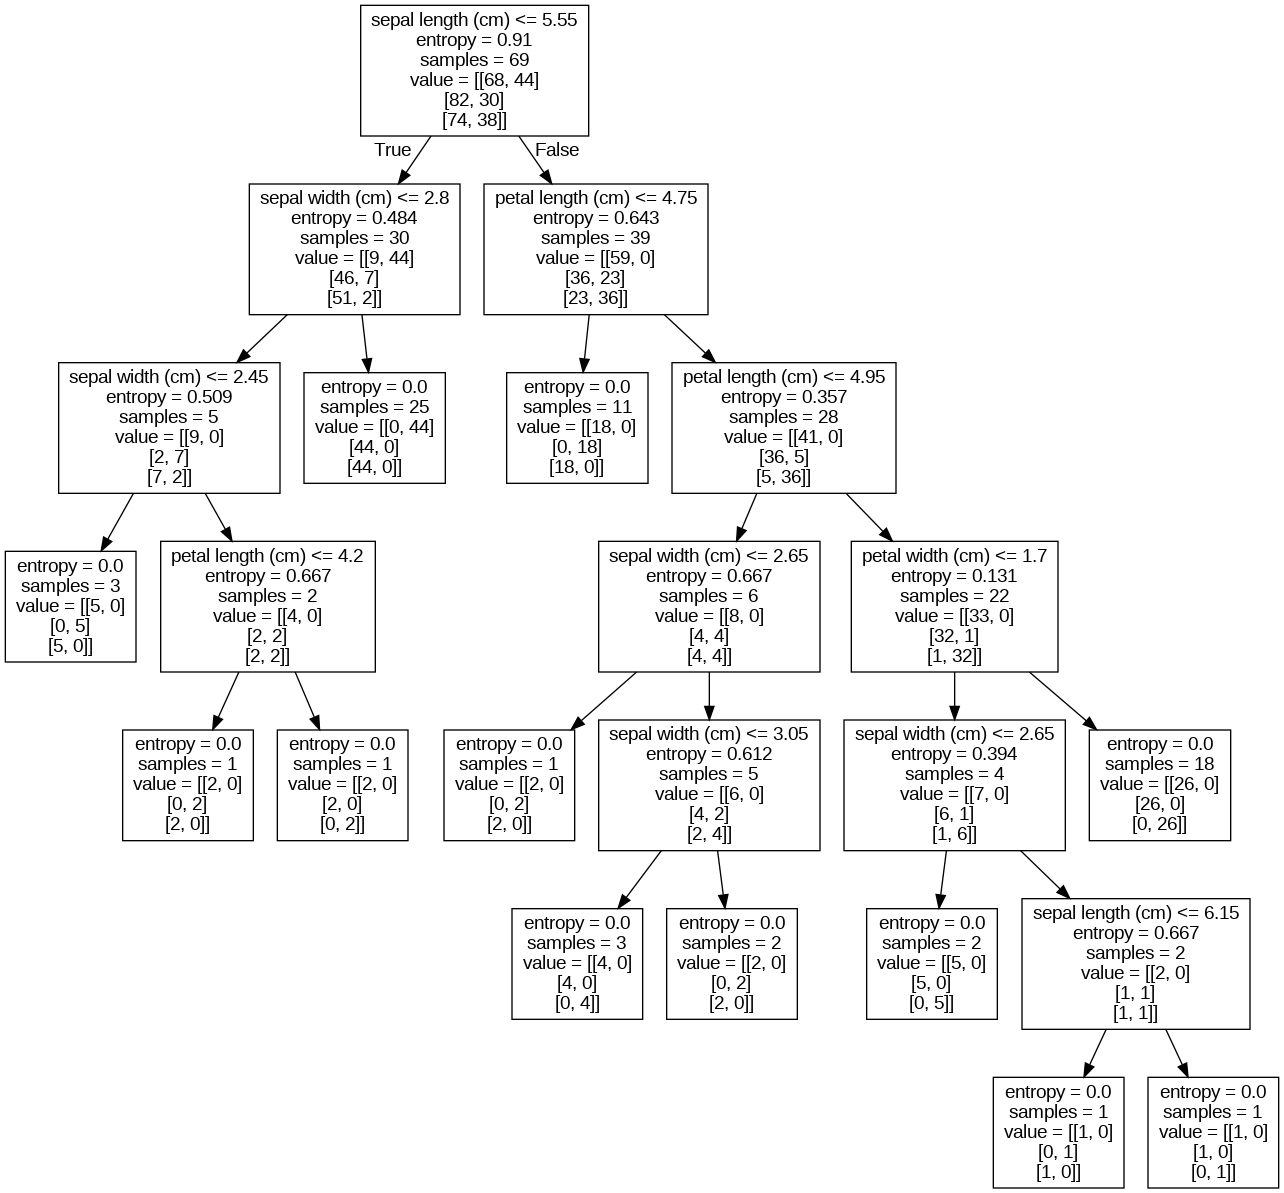

In [28]:
dt = rf.estimators_[0]
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Para analisar o desempenho do algoritmo, podemos calcular algumas métricas.

In [29]:
y_pred = rf.predict(X_test)
a = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, average='micro')
r = recall_score(y_test, y_pred, average='micro')

print('Accuracy:\t%f' % a)
print('Precision:\t%f' % p)
print('Recall: \t%f' % r)

Accuracy:	0.973684
Precision:	0.973684
Recall: 	0.973684


Além do mais, podemos analisar a matriz de confusão. Novamente, note que o resultado ficou bastante bom e que apenas uma instância foi classificada incorretamente.

In [30]:
classes = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(classes, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

### Exercício 2

Crie uma random forest para resolver um dos outros datasets de classificação disponíveis no scikit-learn. A lista de datasets pode ser encontrada [aqui](https://scikit-learn.org/stable/datasets/real_world.html). Utilize um dataset diferente do utilizado no exercício 1. A tarefa consiste em importar os dados, treinar o algoritmo e avaliar os resultados.

[The 20 newsgroups text dataset](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset)

O dataset 20 newsgroups compreende cerca de 18.000 postagens categorizadas em 20 tópicos.

In [41]:
# Realizando a importação
from sklearn.datasets import fetch_20newsgroups_vectorized

In [42]:
# Carregando o dataset
newsgroups_data = fetch_20newsgroups_vectorized(subset='all')
X = newsgroups_data.data
y = newsgroups_data.target

In [43]:
# Dividindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Explorando os dados
print("Formato de X:", X.shape)
print("Formato de y:", y.shape)

Formato de X: (18846, 130107)
Formato de y: (18846,)


In [35]:
# Explorando os dados
newsgroups_data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [36]:
# Explorando os dados
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [37]:
# Treinando o modelo
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [38]:
# Fazendo as predições
y_pred = clf.predict(X_test)

In [39]:
# Avaliação de performance - Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.8494870887866997


In [40]:
# Avaliação de performance - Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=newsgroups_data.target_names))

Relatório de Classificação:
                          precision    recall  f1-score   support

             alt.atheism       0.91      0.80      0.85       240
           comp.graphics       0.67      0.79      0.72       296
 comp.os.ms-windows.misc       0.79      0.84      0.81       319
comp.sys.ibm.pc.hardware       0.72      0.74      0.73       287
   comp.sys.mac.hardware       0.84      0.83      0.84       273
          comp.windows.x       0.88      0.80      0.84       324
            misc.forsale       0.72      0.91      0.81       292
               rec.autos       0.87      0.84      0.86       308
         rec.motorcycles       0.92      0.91      0.92       291
      rec.sport.baseball       0.89      0.94      0.91       295
        rec.sport.hockey       0.95      0.98      0.96       288
               sci.crypt       0.94      0.96      0.95       314
         sci.electronics       0.85      0.67      0.75       287
                 sci.med       0.85      0.86  